In [0]:
import keras
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, Input
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from PIL import ImageFile, Image
ImageFile.LOAD_TRUNCATED_IMAGES = True
Image.MAX_IMAGE_PIXELS = 1000000000

In [1]:
train_dir='/data/Training/'
test_dir='/data/Testing/'

In [0]:
masuk=Input(shape=(150,150,3))
x = Conv2D(16, 3, activation='relu')(masuk)
x = MaxPooling2D(2)(x)

x = Conv2D(32, 3, activation='relu')(x)
x = MaxPooling2D(2)(x)

x = Conv2D(64, 3, activation='relu')(x)
x = MaxPooling2D(2)(x)
x=Flatten()(x)
x=Dense(4096,activation='relu')(x)
pred=Dense(3,activation='softmax')(x)

cnn=Model(inputs=masuk,outputs=pred)

In [17]:
cnn.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])
cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 64)        0         
__________

In [18]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

Found 9560 images belonging to 3 classes.
Found 105 images belonging to 3 classes.


In [20]:
cnn.fit_generator(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=20,
      validation_data=test_generator,
      validation_steps=25,  # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/20


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:872: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


 - 68s - loss: 0.3692 - acc: 0.8685 - val_loss: 0.3571 - val_acc: 0.8847
Epoch 2/20
 - 46s - loss: 0.3351 - acc: 0.8865 - val_loss: 0.3810 - val_acc: 0.8773
Epoch 3/20
 - 50s - loss: 0.3380 - acc: 0.8840 - val_loss: 0.3823 - val_acc: 0.8523
Epoch 4/20
 - 39s - loss: 0.2993 - acc: 0.8820 - val_loss: 0.4731 - val_acc: 0.8591
Epoch 5/20
 - 46s - loss: 0.3281 - acc: 0.9015 - val_loss: 0.6234 - val_acc: 0.7727
Epoch 6/20
 - 70s - loss: 0.3468 - acc: 0.8840 - val_loss: 0.7466 - val_acc: 0.8386
Epoch 7/20
 - 56s - loss: 0.3160 - acc: 0.8920 - val_loss: 0.5589 - val_acc: 0.8400
Epoch 8/20
 - 50s - loss: 0.2977 - acc: 0.9045 - val_loss: 1.0477 - val_acc: 0.7477
Epoch 9/20
 - 45s - loss: 0.2879 - acc: 0.8965 - val_loss: 1.0470 - val_acc: 0.7523
Epoch 10/20
 - 45s - loss: 0.3360 - acc: 0.8890 - val_loss: 0.4337 - val_acc: 0.8750
Epoch 11/20
 - 56s - loss: 0.3384 - acc: 0.8780 - val_loss: 0.7480 - val_acc: 0.7909
Epoch 12/20
 - 57s - loss: 0.2621 - acc: 0.9030 - val_loss: 0.5756 - val_acc: 0.8023


Text(0.5, 1.0, 'Akurasi Training dan validasi')

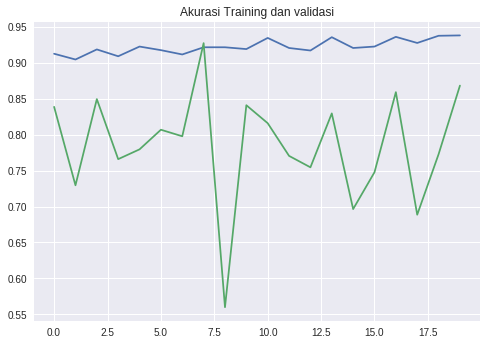

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Akurasi Training dan validasi')

In [0]:
cnn.save('classifier.h5')